## Libs

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor

## Get data train & test

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

In [2]:
%%time
PATH_TO_TRAIN = "../data/train.csv"
PATH_TO_TEST = "../data/test.csv"

train = pd.read_csv(PATH_TO_TRAIN)
test = pd.read_csv(PATH_TO_TEST)

Wall time: 12.7 s


# Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [3]:
train[:2]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [4]:
test[:2]

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760


## dfs shapes

In [5]:
print('train.shape = {} rows, {} cols'.format(*train.shape))
print('test.shape = {} rows, {} cols'.format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


## base stats

In [6]:
%%time
train.describe()

Wall time: 1.66 s


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [7]:
%%time
test.describe()

Wall time: 1.67 s


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


## check missings

In [8]:
def check_missings(df, name=''):
    coefs = df.count() / train.shape[0]
    if (coefs < 1).any():
        print(name, 'missings')
        for i, v in coefs.items():
            if v < 1:
                print(f'\t{v} = {1 - i * 100}%')
    else:
        print(name, 'no missings')

In [9]:
check_missings(train, 'train')
check_missings(test, 'test')

train no missings
test no missings


## Вывод:
- объемный дадасет с большик числов фичей
- все показатели являются вещественными числами
- так же наблюдаются отрицательные показатели
- пропусков нет

# Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

In [10]:
target_vc = train['target'].value_counts()
target_vc

0    179902
1     20098
Name: target, dtype: int64

In [11]:
print(target_vc / train['target'].count() * 100)

0    89.951
1    10.049
Name: target, dtype: float64


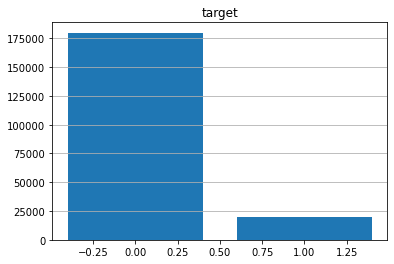

In [12]:
plt.title('target')
plt.bar(target_vc.index, target_vc.values)
plt.grid(axis='y')
plt.show()

## Вывод:
- таргет иммент 2 класса - 0 и 1
- 1 класс - составляет 1/10 от всей выборки

# Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

In [13]:
features = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 'var_20', 'var_26', 'var_40', 'var_55', 'var_80', 
            'var_106', 'var_109', 'var_139', 'var_175', 'var_184', 'var_196']

# для ускорения работы отберу случайные семплы из рекомендованныйх признаков
x_arr = [np.random.choice(features) for _ in range(8)]
y_arr = [np.random.choice(features) for _ in range(8)]

len(features)

18

## Target features distribution

In [14]:
def scattering_target(df, x_arr, y_arr, target=None, rows=2, cols=4, figsize=(16, 8), wspace=0.3, hspace=0.3):
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    
    for i in range(rows):
        for j in range(cols):
            
            idx = i * cols + j
            x, y = x_arr[idx], y_arr[idx]
            
            ax[i, j].set_title(f'{x} & {y}')
            ax[i, j].scatter(df[x], df[y], c=df[target] if target else None, alpha=0.5)
                
            ax[i, j].set_xlabel(x)
            ax[i, j].set_ylabel(y)
            
            plt.subplots_adjust(wspace=wspace, hspace=hspace)

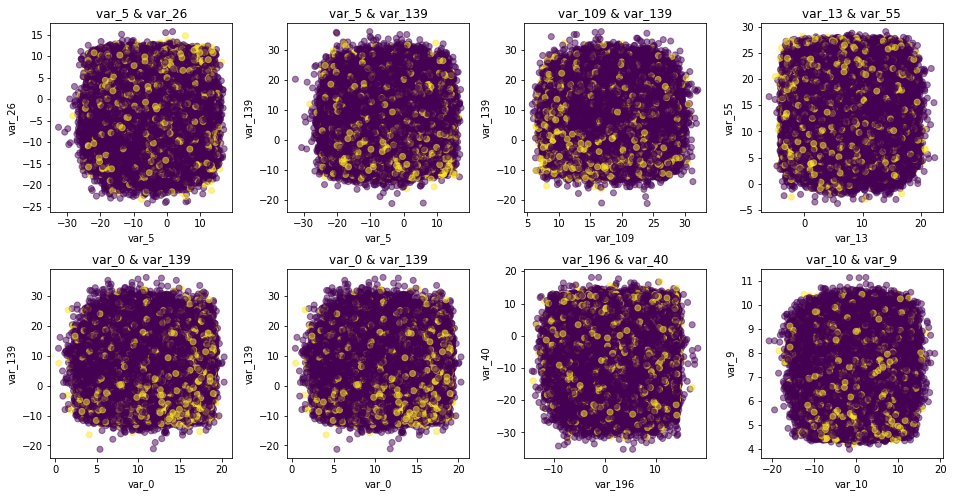

In [15]:
scattering_target(train, x_arr=x_arr, y_arr=y_arr, target='target')

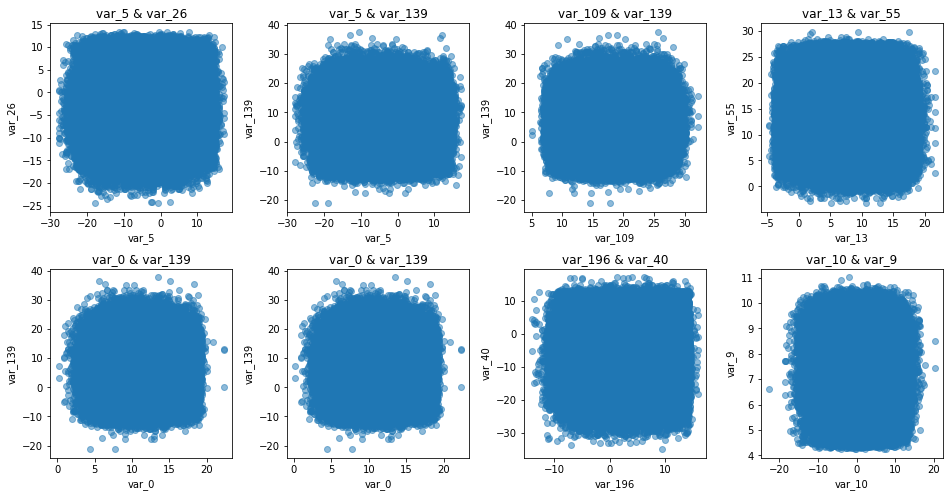

In [16]:
scattering_target(test, x_arr=x_arr, y_arr=y_arr)

## Вывод:
- скапление таргета в трейне не наблюдаются
- все разбросы имеют форму близскую к квадратной с закругленными концами - данные распределены равномерно
- наблюдаются плоские граници разбросов или острые углы между границами - в этих областях данные имеют какую-то значимость  

# Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

In [17]:
%%time

states_class_0 = train[train['target'] == 0].drop(['ID_code', 'target'], axis=1).describe()
states_class_1 = train[train['target'] == 1].drop(['ID_code', 'target'], axis=1).describe()
states_test = test.drop(['ID_code'], axis=1).describe()

states_test.index

Wall time: 4.1 s


Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [18]:
def stat_plots(stat_name):
    
    plt.figure(figsize=(16, 4))
    plt.title(stat_name)
    
    plt.plot(states_class_1.loc[stat_name], alpha=0.5, label='class 1')
    plt.plot(states_class_0.loc[stat_name], alpha=0.5, label='class 0')
    plt.plot(states_test.loc[stat_name], alpha=0.5, label='test')
    
    plt.grid(axis='y')
    plt.legend()

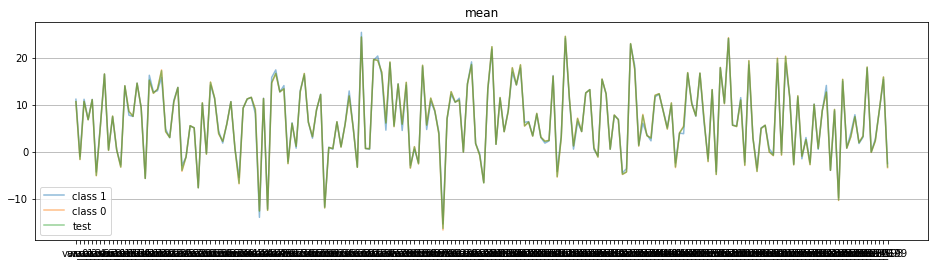

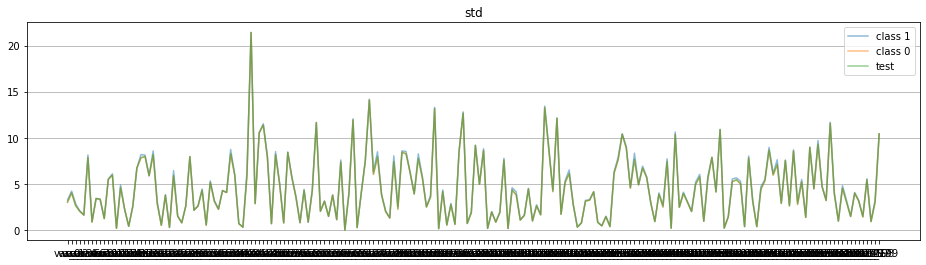

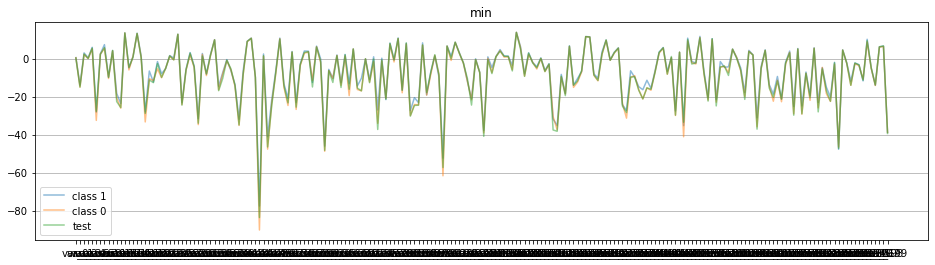

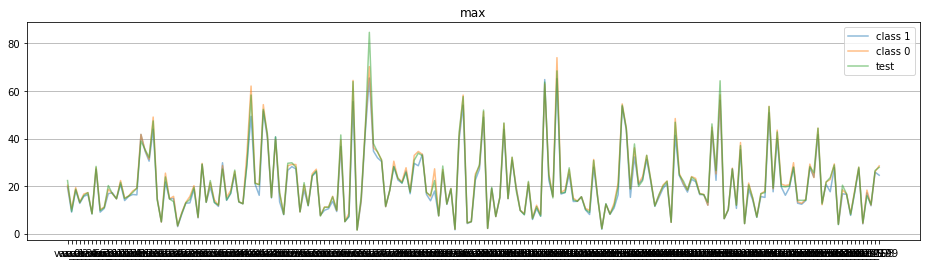

In [19]:
stat_plots('mean')
stat_plots('std')
stat_plots('min')
stat_plots('max')

## Вывод:
- видно, что для всех 3х выборок графики почти идентичны по основным статистикам
- в некоторых областях класс 1 отстает от двух других графиков, возможно из-за меньшего объема данных
- график стандартного откланений в основном колеблется между 0 и 10, есть один показатель который достигает 20
- график минимальных значений в основном колеблется между 10 и -30, есть один показатель который достигает -80
- график максимальных значений в основном колеблется между 0 и 40, есть один показатель который достигает 80

# Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [20]:
%%time
corr_train = train.drop(['ID_code', 'target'], axis=1).corr()
corr_test = test.drop(['ID_code'], axis=1).corr()

Wall time: 38.6 s


In [21]:
corr_train_fl = corr_train.values.flatten()
corr_train_fl = corr_train_fl[corr_train_fl != 1]

corr_test_fl = corr_test.values.flatten()
corr_test_fl = corr_test_fl[corr_test_fl != 1]

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


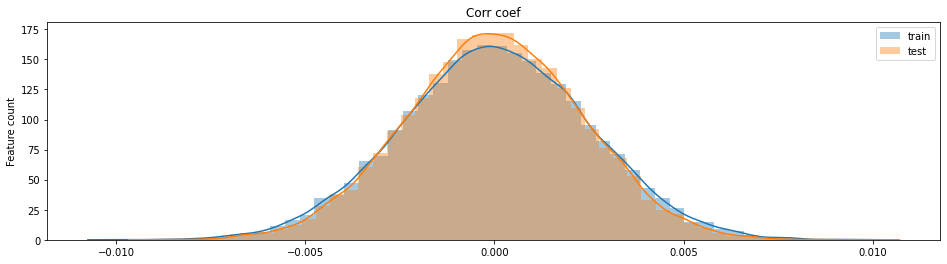

In [22]:
plt.figure(figsize=(16,4))
plt.title('Corr coef')

sns.distplot(corr_train_fl, label='train')
sns.distplot(corr_test_fl, label='test')

plt.ylabel('Feature count')
plt.legend()

In [23]:
list(map(
    len, 
    corr_train_fl[corr_train_fl >= 0.2], 
    corr_test_fl[corr_test_fl >= 0.2]
))

[]

## Вывод:
- Корреляция между фичами не прослеживается

# Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [24]:
part = 0.25

Xy = train.sample(int(train.count()[0] * part))
X = Xy.drop(['ID_code', 'target'], axis=1)
y = Xy['target']

In [25]:
%%time
parameters = {'max_depth': 6, 'n_estimators': 25, 'random_state': 27, 'n_jobs': 2}

forestFool = RandomForestRegressor(**parameters)
forestFool.fit(X, y)

Wall time: 55.5 s


RandomForestRegressor(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

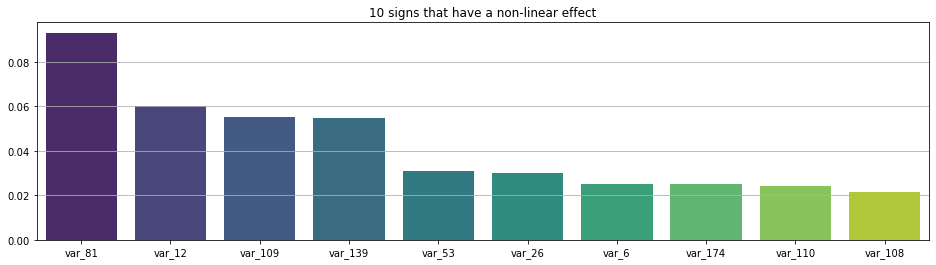

In [26]:
importances = forestFool.feature_importances_
idx = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(16, 4))
plt.title('10 signs that have a non-linear effect')
sns.barplot(x=X.columns[idx], y=importances[idx], palette='viridis')
plt.grid(axis='y')

# Задание 7 (опция): Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

## kolmogorov-smirnov

..........

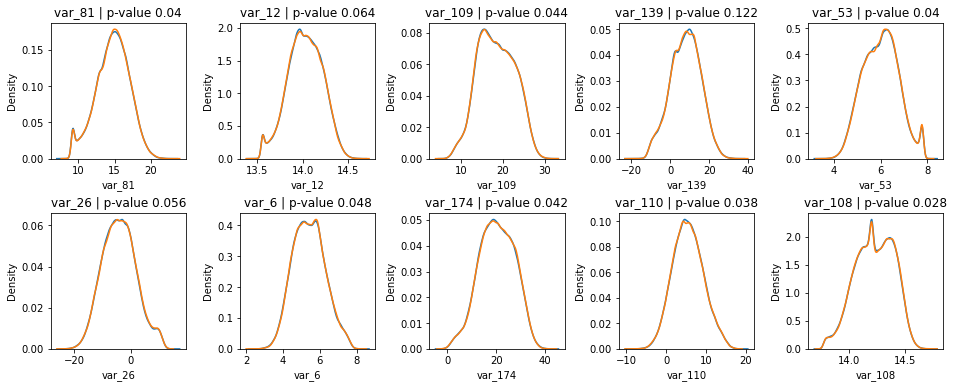

In [28]:
stats_arr = []
fig, ax = plt.subplots(2, 5, figsize=(16, 6))

for num, feature in enumerate(X.columns[idx]):
    print('.', end='')
    stat, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    stats_arr.append(stat)
    
    ax[num//5, num%5].set_title(f'{feature} | p-value {round(stat, 3)}')
    
    sns.kdeplot(train[feature], ax=ax[num//5, num%5], label='train')
    sns.kdeplot(test[feature], ax=ax[num//5, num%5], label='test')
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

## Вывод:
- Максимальное различие на тесте Калмагорова-Смирнова - 0.06, выборки почти полностью идентичны